In [1]:
import csv
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, gradient_boosting
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

In [2]:
df=pd.read_excel(r'C:\Users\Nikhil\Downloads\archive1\train_agriculture.xlsx')

In [3]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [4]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [5]:
df.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [6]:
df = df.dropna(subset =['Number_Weeks_Used'])

In [7]:
df.shape

(4157, 10)

In [8]:
df.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [9]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1368.286264,0.225403,0.475343,2.282175,26.528747,28.891027,9.293481,1.891989,0.191484
std,815.550890,0.417898,0.499452,0.471010,15.651629,12.586005,9.753605,0.696910,0.452663
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


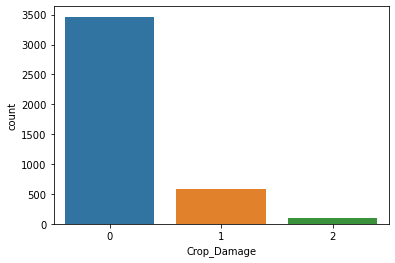

In [10]:
sns.countplot(df['Crop_Damage'])

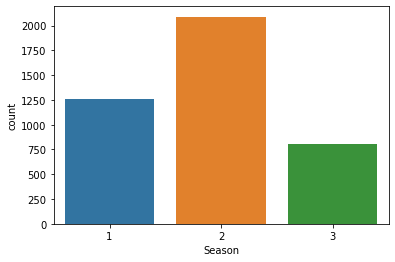

In [11]:
sns.countplot(df['Season'])

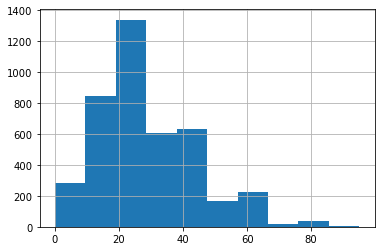

In [12]:
df['Number_Doses_Week'].hist()

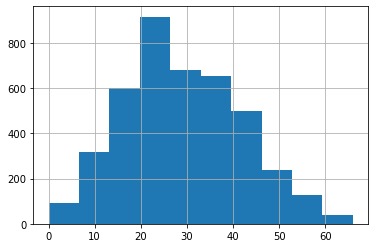

In [13]:
df['Number_Weeks_Used'].hist()

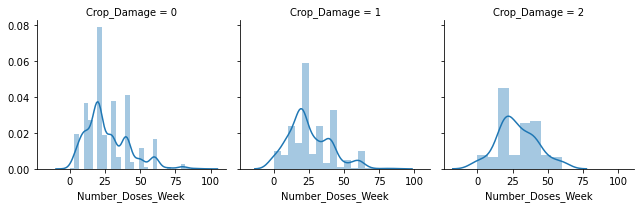

In [14]:
facet=sns.FacetGrid(df,col='Crop_Damage')
facet.map(sns.distplot,'Number_Doses_Week')
plt.show()

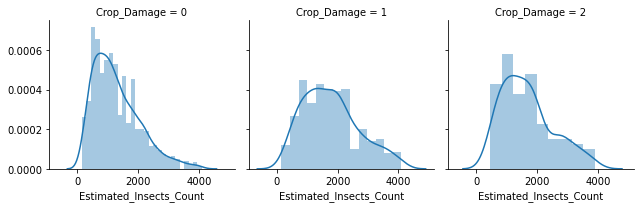

In [15]:
facet=sns.FacetGrid(df,col='Crop_Damage')
facet.map(sns.distplot,'Estimated_Insects_Count')
plt.show()

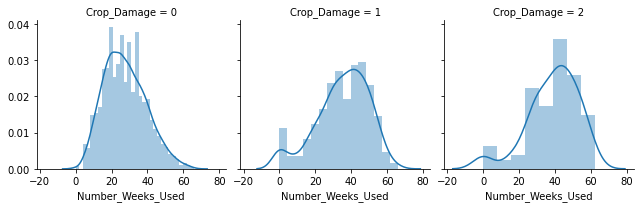

In [16]:
facet=sns.FacetGrid(df,col='Crop_Damage')
facet.map(sns.distplot,'Number_Weeks_Used')
plt.show()

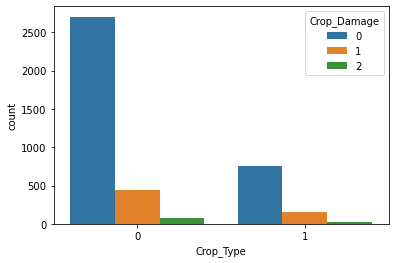

In [17]:
sns.countplot(x='Crop_Type', hue='Crop_Damage', data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB533E0E50>,
      dtype=object)

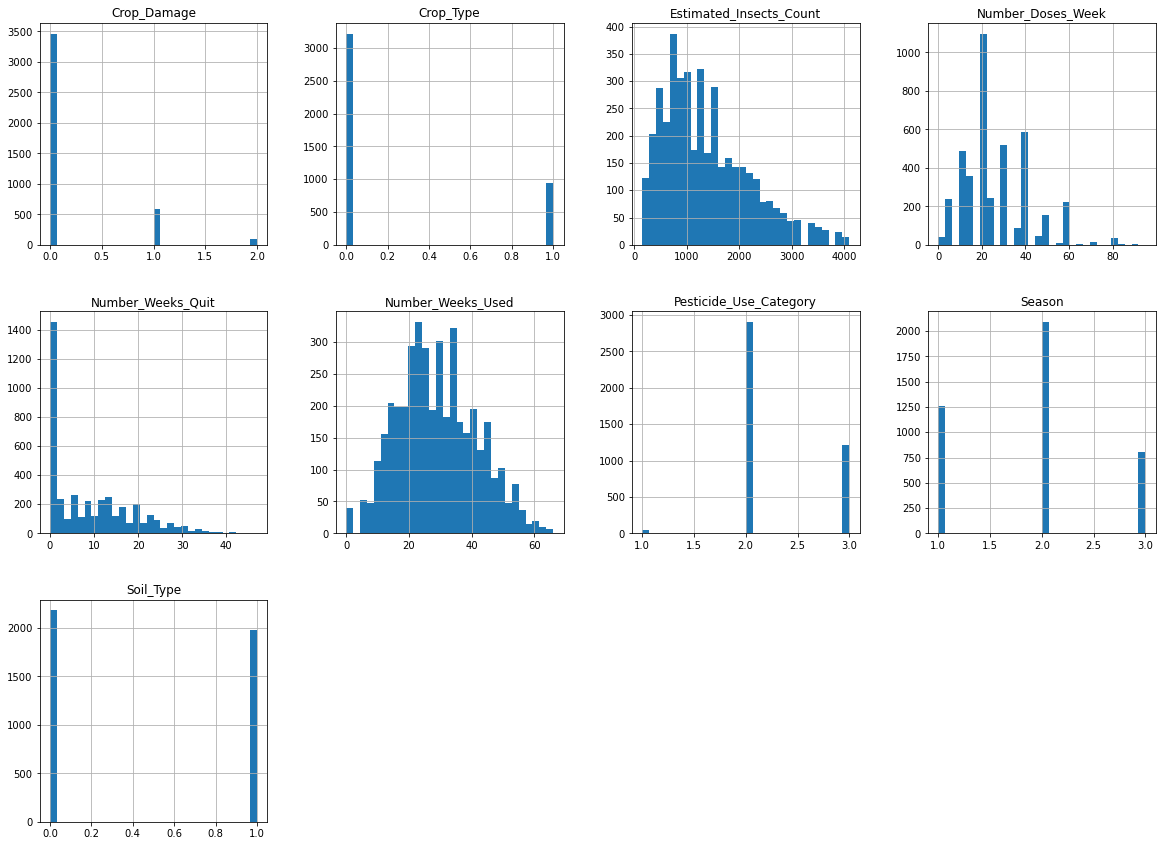

In [18]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [19]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.039040,-0.156353,-0.035732,-0.124894,0.449470,0.249871,-0.015429,0.196067
Crop_Type,-0.039040,1.000000,-0.174532,0.355242,-0.165631,-0.002237,-0.272315,0.001822,0.027448
Soil_Type,-0.156353,-0.174532,1.000000,0.020889,0.051378,-0.098399,-0.037584,0.003753,-0.057868
Pesticide_Use_Category,-0.035732,0.355242,0.020889,1.000000,-0.007122,0.387982,-0.570960,0.010773,0.202449
Number_Doses_Week,-0.124894,-0.165631,0.051378,-0.007122,1.000000,0.104022,-0.032430,-0.006366,-0.017724
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.249871,-0.272315,-0.037584,-0.570960,-0.032430,-0.467386,1.000000,0.002753,-0.155354
Season,-0.015429,0.001822,0.003753,0.010773,-0.006366,-0.011108,0.002753,1.000000,-0.016798
Crop_Damage,0.196067,0.027448,-0.057868,0.202449,-0.017724,0.244988,-0.155354,-0.016798,1.000000


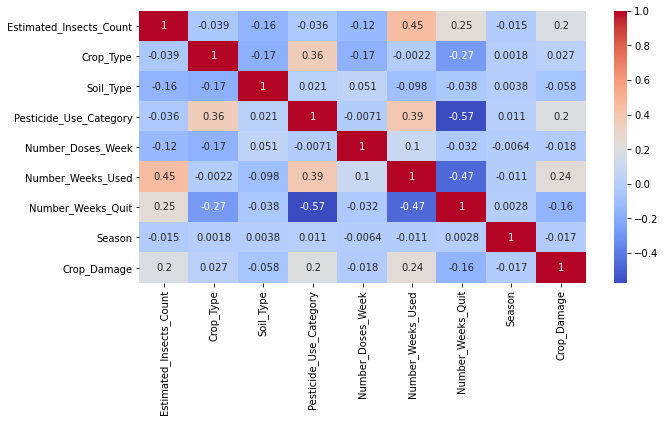

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [21]:
df.skew()

Estimated_Insects_Count    0.915308
Crop_Type                  1.314816
Soil_Type                  0.098785
Pesticide_Use_Category     0.689065
Number_Doses_Week          0.963165
Number_Weeks_Used          0.264944
Number_Weeks_Quit          0.916936
Season                     0.149567
Crop_Damage                2.340099
dtype: float64

In [22]:
le=LabelEncoder()

In [23]:
df['ID']=le.fit_transform(df['ID'])

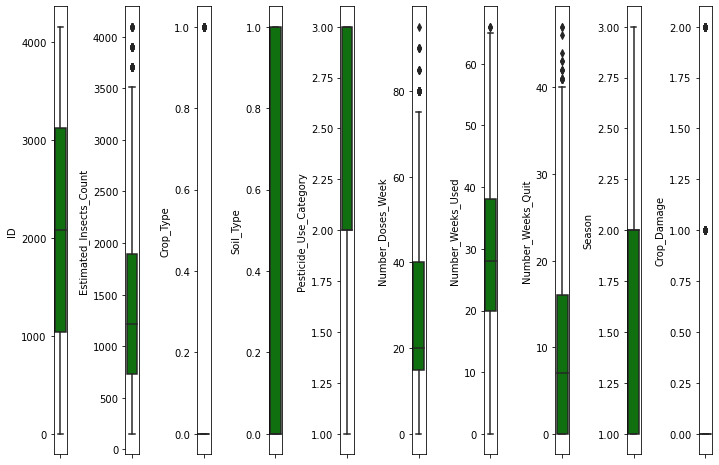

In [24]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [25]:

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(4157, 10)

In [26]:
threshold=3
print(np.where(z>3))

(array([   5,    7,   11,   18,   19,   90,   93,  102,  136,  149,  150,
        151,  162,  168,  169,  179,  186,  199,  200,  219,  225,  227,
        239,  240,  262,  268,  274,  284,  293,  311,  316,  319,  325,
        336,  339,  346,  411,  415,  422,  433,  462,  467,  472,  505,
        551,  571,  627,  635,  636,  637,  638,  726,  736,  770,  771,
        822,  882,  897,  916,  918,  985, 1058, 1090, 1158, 1174, 1189,
       1191, 1192, 1194, 1202, 1204, 1205, 1206, 1207, 1208, 1209, 1210,
       1211, 1211, 1212, 1213, 1263, 1296, 1308, 1337, 1366, 1425, 1483,
       1485, 1559, 1621, 1678, 1814, 1837, 1880, 1925, 1928, 1929, 1949,
       1953, 1954, 1963, 1965, 1968, 1970, 1970, 1971, 1972, 1973, 1974,
       2009, 2149, 2297, 2308, 2326, 2330, 2331, 2331, 2332, 2351, 2402,
       2423, 2436, 2439, 2441, 2448, 2487, 2499, 2510, 2514, 2515, 2521,
       2523, 2529, 2539, 2540, 2545, 2549, 2558, 2566, 2575, 2590, 2612,
       2615, 2617, 2620, 2621, 2640, 2641, 2704, 2

In [27]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4157, 10)
(3949, 10)


In [28]:
x=df_new.drop('Crop_Damage',axis=1)
y=df_new['Crop_Damage']

In [29]:
#scaling in input variables
ss=StandardScaler()
x=ss.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

In [32]:
#finding the best parameter using Gridsearch cV
parameters={'C':[1,10], 'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [33]:
#finding the best parameter using Gridsearch cV
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 24}


In [34]:
LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()

In [35]:
model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*************************************************************************')
    print('\n')

Accuracy score of LogisticRegression(random_state=42) is:
0.8645569620253165
[[674  10]
 [ 97   9]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       684
           1       0.47      0.08      0.14       106

    accuracy                           0.86       790
   macro avg       0.67      0.54      0.54       790
weighted avg       0.82      0.86      0.82       790

*************************************************************************


Accuracy score of GaussianNB() is:
0.839240506329114
[[624  60]
 [ 67  39]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       684
           1       0.39      0.37      0.38       106

    accuracy                           0.84       790
   macro avg       0.65      0.64      0.64       790
weighted avg       0.83      0.84      0.84       790

*************************************************************************


Accuracy score of 

# using ensembling techniques to boost up our score

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*************************************************************************')
    print('\n')

Accuracy score of RandomForestClassifier() is:
0.8569620253164557
[[652  32]
 [ 81  25]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       684
           1       0.44      0.24      0.31       106

    accuracy                           0.86       790
   macro avg       0.66      0.59      0.61       790
weighted avg       0.83      0.86      0.84       790

*************************************************************************


Accuracy score of AdaBoostClassifier() is:
0.8607594936708861
[[668  16]
 [ 94  12]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       684
           1       0.43      0.11      0.18       106

    accuracy                           0.86       790
   macro avg       0.65      0.54      0.55       790
weighted avg       0.82      0.86      0.82       790

*************************************************************************


Accuracy score of Gr

In [66]:
AdaBoostClassifier().fit(x_train,y_train)

AdaBoostClassifier()

In [38]:
#cross validate the boosting model 

model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('model:',m)
    print('Score:',score)
    print('Mean_score:',score.mean())
    print('Standard_deviation:',score.std())
    print('******************************************************************************')
    print('\n')

model: RandomForestClassifier()
Score: [0.14177215 0.07848101 0.32658228 0.19240506 0.7721519  0.75696203
 0.26835443 0.52151899 0.31139241 0.85786802]
Mean_score: 0.42274882734691255
Standard_deviation: 0.2699773291061067
******************************************************************************


model: AdaBoostClassifier()
Score: [0.14177215 0.57721519 0.38481013 0.85316456 0.8556962  0.85063291
 0.44050633 0.83797468 0.73924051 0.86040609]
Mean_score: 0.6541418749598407
Standard_deviation: 0.24270234712054373
******************************************************************************


model: GradientBoostingClassifier()
Score: [0.14177215 0.08860759 0.29873418 0.14177215 0.78734177 0.82025316
 0.29113924 0.3164557  0.32405063 0.85786802]
Mean_score: 0.406799460258305
Standard_deviation: 0.28302102926719164
******************************************************************************


model: BaggingClassifier()
Score: [0.14177215 0.04050633 0.38227848 0.15696203 0.73670886

In [68]:
import joblib
joblib.dump(AdaBoostClassifier(),"Project10_agriculture.pkl")

['Project10_agriculture.pkl']

# using test dataset

In [69]:
test_df=pd.read_excel(r'C:\Users\Nikhil\Downloads\test_agriculture.xlsx')

In [70]:
test_df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [71]:
test_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [72]:
test_df.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [73]:
test_df = test_df.dropna(subset =['Number_Weeks_Used'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB55E798B0>,
      dtype=object)

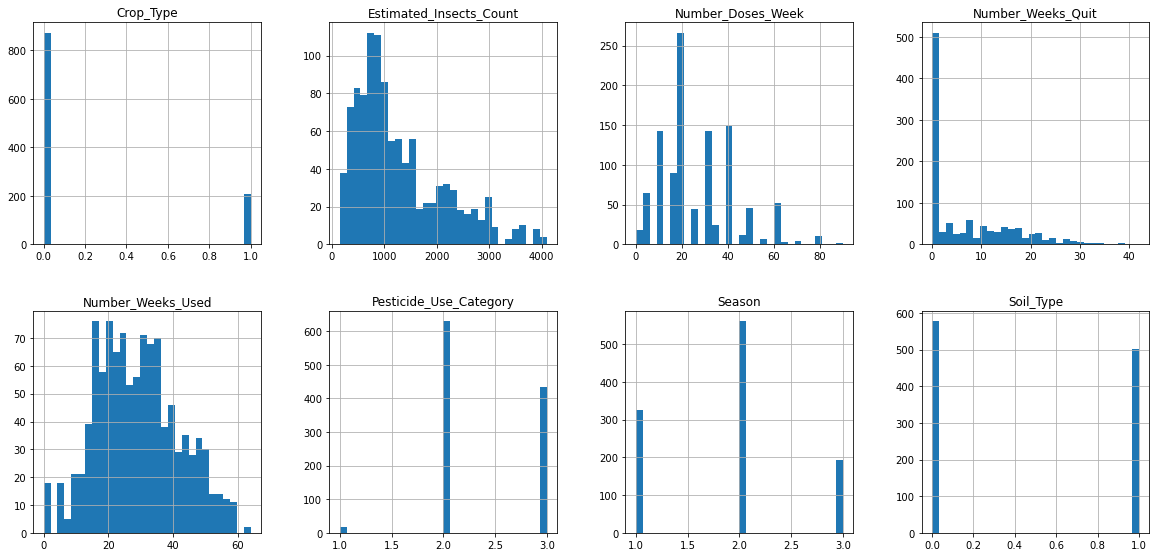

In [74]:
test_df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [75]:
test_df['ID']=le.fit_transform(test_df['ID'])

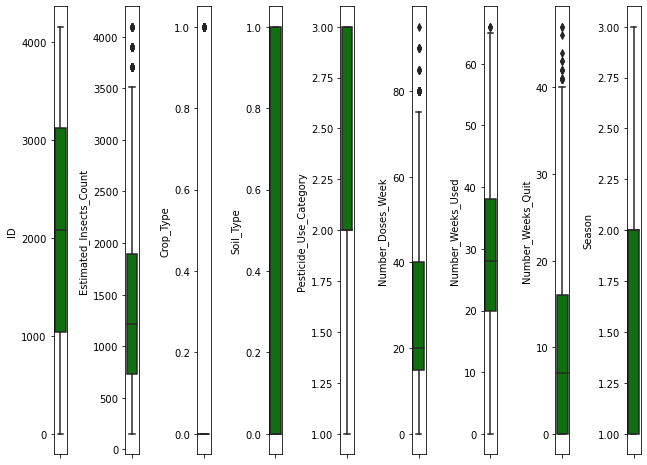

In [76]:
collist=test_df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [77]:

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(test_df))
z.shape

(1080, 9)

In [78]:
threshold=3
print(np.where(z>3))

(array([  45,   75,  115,  122,  160,  228,  249,  250,  251,  448,  449,
        450,  478,  513,  551,  566,  672,  692,  740,  742,  765,  776,
        778,  787,  792,  795,  797,  802,  804,  810,  811,  812,  813,
        814,  815,  924, 1036], dtype=int64), array([5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 5, 5], dtype=int64))


In [79]:
df1_new=test_df[(z<3).all(axis=1)]
print(test_df.shape)
print(df1_new.shape)

(1080, 9)
(1043, 9)


In [80]:
fitted_model=joblib.load(open('Project10_agriculture.pkl','rb'))

In [81]:
fitted_model

AdaBoostClassifier()